Using TensorFlow backend.


170500096/170498071 [==============================] - 24s 0us/step


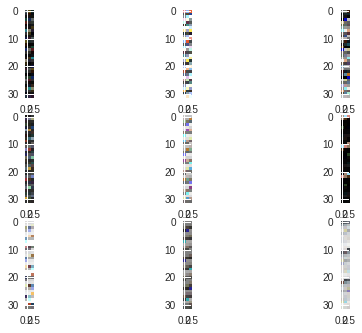

(45000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
ma

ValueError: ignored

In [1]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
from keras.datasets import cifar10
from keras import backend as K
from matplotlib import pyplot
from PIL import Image
from sklearn.model_selection import train_test_split

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Image.fromarray(np.rollaxis(X_train[i],0,3),'RGB'))
    
## show the plot
pyplot.show()

K.set_image_dim_ordering('th')
seed = 7
np.random.seed(seed)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
num_classes = y_test.shape[1]
print(X_train.shape)

#Create the model now
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (3,32,32), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

epochs = 25 
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))